## Datasources

<!-- Describe each datasources you plan to use in a section. Use the prefic "DatasourceX" where X is the id of the datasource. -->

### Datasource1: Electric Vehicle Population Size History By County
* Metadata URL: https://data.wa.gov/Transportation/Electric-Vehicle-Population-Size-History-By-County/3d5d-sdqb/about_data
* Data URL: https://data.wa.gov/resource/3d5d-sdqb.csv?$limit=50000
* Data Type: CSV
* License: [Open Data Commons Open Database License](https://opendatacommons.org/licenses/odbl/1-0/)

Washington State Open Data Portal. Free public data published by Washington state agencies and partners.

### Datasource3: Motor Fuel - Gasoline Volumes Distributed
* Metadata URL: https://data.transportation.gov/Roadways-and-Bridges/Motor-Fuel-Gasoline-Volumes-Distributed/5qxh-t94v/about_data
* Data URL: https://data.transportation.gov/resource/5qxh-t94v.csv?$limit=50000
* Data Type: CSV
* License: [Public Domain](https://opendatacommons.org/licenses/pddl/)

Data.Transportation.gov, the U.S. Department of Transportation's public data portal.

### Datasource4: Special Fuel Volumes Distributed
* Metadata URL: https://data.transportation.gov/Roadways-and-Bridges/Special-Fuel-Volumes-Distributed/5n49-mh85/about_data
* Data URL: https://data.transportation.gov/resource/5n49-mh85.csv?$limit=50000
* Data Type: CSV
* License: [Public Domain](https://opendatacommons.org/licenses/pddl/)

Data.Transportation.gov, the U.S. Department of Transportation's public data portal.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt


data_dir = '../data'

data_links = ['https://data.wa.gov/resource/3d5d-sdqb.csv?$limit=50000',
              'https://data.transportation.gov/resource/5qxh-t94v.csv?$limit=50000',
              'https://data.transportation.gov/resource/5n49-mh85.csv?$limit=50000']

file_names = ['electric_car_population.csv', 
              'motor_fuel_distribution.csv', 
              'special_fuel_distribution.csv']
# read
df0 = pd.read_csv(data_links[0])
df1 = pd.read_csv(data_links[1])
df2 = pd.read_csv(data_links[2])

# select only Washington state
df0 = df0[df0['state'] == 'WA']
df1 = df1[df1['state'] == 'Washington']
df2 = df2[df2['state'] == 'Washington']

# save
df0.to_csv(os.path.join(data_dir, file_names[0]), index=False)
df1.to_csv(os.path.join(data_dir, file_names[1]), index=False)
df2.to_csv(os.path.join(data_dir, file_names[2]), index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 7332 entries, 0 to 23937
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   date                                     7332 non-null   object 
 1   county                                   7332 non-null   object 
 2   state                                    7332 non-null   object 
 3   vehicle_primary_use                      7332 non-null   object 
 4   battery_electric_vehicles_bevs_          7332 non-null   int64  
 5   plug_in_hybrid_electric_vehicles_phevs_  7332 non-null   int64  
 6   electric_vehicle_ev_total                7332 non-null   int64  
 7   non_electric_vehicles                    7332 non-null   int64  
 8   total_vehicles                           7332 non-null   int64  
 9   percent_electric_vehicles                7332 non-null   float64
dtypes: float64(1), int64(5), object(4)
memory usage: 630

C:\Users\Kornelije\AppData\Local\Temp\ipykernel_8568\3285066883.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_king['date'] = pd.to_datetime(df_king['date'])
C:\Users\Kornelije\AppData\Local\Temp\ipykernel_8568\3285066883.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_king.sort_values(by='date', inplace=True)


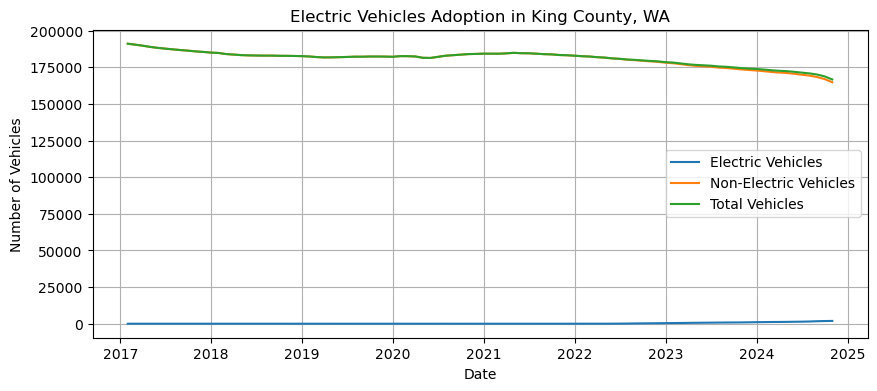

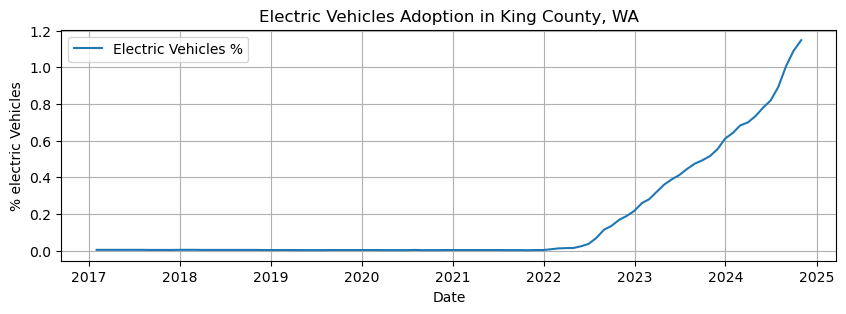

In [2]:
print(df0.info())

# Filter data for King county, WA
df_king = df0[(df0['county'] == 'King') & (df0['state'] == 'WA') & (df0['vehicle_primary_use'] == 'Truck')]

print(df_king.info())

# Convert date column to datetime
df_king['date'] = pd.to_datetime(df_king['date'])
df_king.sort_values(by='date', inplace=True)

# Plot the time series chart
plt.figure(figsize=(10,4))
plt.plot(df_king['date'], df_king['electric_vehicle_ev_total'], label='Electric Vehicles')
plt.plot(df_king['date'], df_king['non_electric_vehicles'], label='Non-Electric Vehicles')
plt.plot(df_king['date'], df_king['total_vehicles'], label='Total Vehicles')
plt.xlabel('Date')
plt.ylabel('Number of Vehicles')
plt.title('Electric Vehicles Adoption in King County, WA')
plt.grid(True)
plt.legend()
plt.show()

# Plot the time series chart
plt.figure(figsize=(10,3))
plt.plot(df_king['date'], df_king['percent_electric_vehicles'], label='Electric Vehicles %')
plt.xlabel('Date')
plt.ylabel(f'% electric Vehicles')
plt.title('Electric Vehicles Adoption in King County, WA')
plt.grid(True)
plt.legend()
plt.show()


<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, 564 to 3065
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   state                54 non-null     object        
 1   year                 54 non-null     int64         
 2   month                54 non-null     object        
 3   vol_gasoline         54 non-null     int64         
 4   data_type            54 non-null     object        
 5   date_modified        54 non-null     object        
 6   date                 54 non-null     datetime64[ns]
 7   vol_gasoline_liters  54 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 3.8+ KB
None


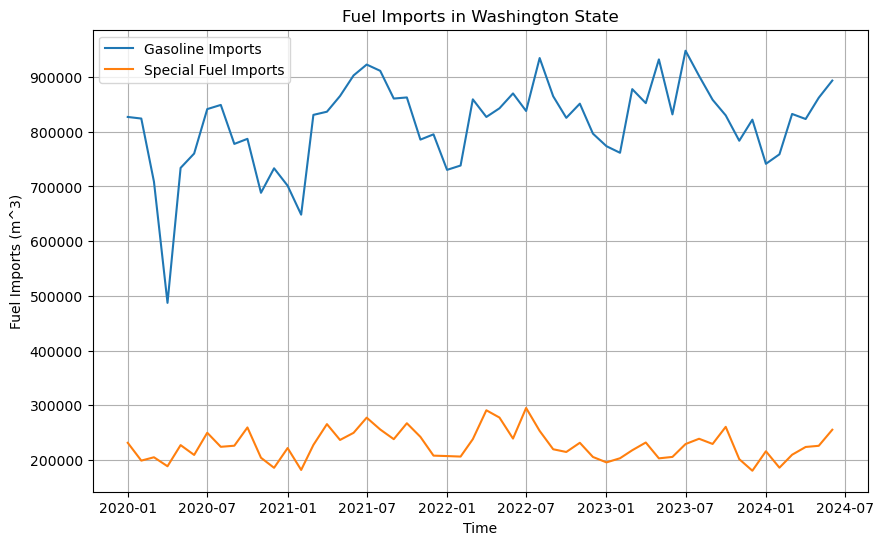

In [8]:
print(df1.info())

import matplotlib.pyplot as plt

# Create a new column with the month name and year
df1['date'] = pd.to_datetime(df1[['year', 'month']].apply(lambda x: f"{x['year']}-{x['month']}", axis=1), format='%Y-%B')
df2['date'] = pd.to_datetime(df2[['year', 'month']].apply(lambda x: f"{x['year']}-{x['month']}", axis=1), format='%Y-%B')

# Remove rows with zero values
df1 = df1[df1['vol_gasoline'] != 0]
df2 = df2[df2['vol_spec_fuel'] != 0]

# Convert gallons to cubic meters
df1['vol_gasoline_m3'] = df1['vol_gasoline'] * 0.0037854
df2['vol_spec_fuel_m3'] = df2['vol_spec_fuel'] * 0.0037854

# Plot the time series chart
plt.figure(figsize=(10,6))
plt.plot(df1['date'], df1['vol_gasoline_m3'], label='Gasoline Imports')
plt.plot(df2['date'], df2['vol_spec_fuel_m3'], label='Special Fuel Imports')
plt.xlabel('Time')
plt.ylabel('Fuel Imports (m^3)')
plt.title('Fuel Imports in Washington State')
plt.grid(True)
plt.legend()
plt.show()

In [6]:
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 564 to 3071
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   state          60 non-null     object
 1   year           60 non-null     int64 
 2   month          60 non-null     object
 3   vol_spec_fuel  60 non-null     int64 
 4   data_type      60 non-null     object
 5   date_modified  60 non-null     object
dtypes: int64(2), object(4)
memory usage: 3.3+ KB
None


In [ ]:
CO_link = f'https://aqs.epa.gov/aqsweb/airdata/daily_42101_{year}.zip' # carbon monoxide
NO2_link = f'https://aqs.epa.gov/aqsweb/airdata/daily_42602_{year}.zip' # Nitrogen dioxide
PM10_Speciation_link = f'https://aqs.epa.gov/aqsweb/airdata/daily_PM10SPEC_{year}.zip'
PM25_Speciation_link = f'https://aqs.epa.gov/aqsweb/airdata/daily_SPEC_{year}.zip' # PM2.5 Speciation



DefaultCredentialsError: Your default credentials were not found. To set up Application Default Credentials, see https://cloud.google.com/docs/authentication/external/set-up-adc for more information.

In [25]:
import os
import requests
import zipfile
import pandas as pd

# Define the root link for data
aqs_root_link = 'https://aqs.epa.gov/aqsweb/airdata/daily_'

# Define data links
data_links = {
    "CO": "42101",
    "NO2": "42602",
    "PM10_Speciation": "PM10SPEC",
    "PM25_Speciation": "SPEC"   # PM2.5
}

# Define years
years = range(2020, 2025)

# Define directories
temp_dir = "../data/temp/"
output_dir = "../data/"
os.makedirs(temp_dir, exist_ok=True)
os.makedirs(output_dir, exist_ok=True)

def download_and_extract(link_key, code, year, temp_dir):
    """Download and extract zip file if not already downloaded."""
    zip_url = f"{aqs_root_link}{code}_{year}.zip"
    zip_file = os.path.join(temp_dir, f"{link_key}_{year}.zip")
    
    # Download the file if it doesn't exist
    if not os.path.exists(zip_file):
        print(f"Downloading: {zip_url}")
        response = requests.get(zip_url)
        with open(zip_file, "wb") as f:
            f.write(response.content)
    else:
        print(f"File already exists: {zip_file}")
    
    # Extract the zip file
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(temp_dir)

def process_data(link_key, code, temp_dir, years):
    """Process data for a specific pollutant link."""
    dataframes = []
    for year in years:
        # Download and extract data
        download_and_extract(link_key, code, year, temp_dir)
        
        # Collect CSV files
        csv_files = [os.path.join(temp_dir, f) for f in os.listdir(temp_dir) if f.endswith('.csv')]
        for csv_file in csv_files:
            try:
                # Read the CSV and filter by 'City Name' == 'Seattle'
                df = pd.read_csv(csv_file)
                df = df[df['City Name'] == 'Seattle']
                dataframes.append(df)
            finally:
                # Close and delete the file
                os.remove(csv_file)
    
    # Concatenate all dataframes for the pollutant
    if dataframes:
        final_df = pd.concat(dataframes, ignore_index=True)
        output_file = os.path.join(output_dir, f"{link_key}_Seattle.csv")
        final_df.to_csv(output_file, index=False)
        print(f"Saved: {output_file}")
    else:
        print(f"No data found for {link_key} in any year.")

# Process each pollutant
for key, code in data_links.items():
    process_data(key, code, temp_dir, years)

print("All files processed and saved.")


Downloading: https://aqs.epa.gov/aqsweb/airdata/daily_42101_2020.zip


C:\Users\Kornelije\AppData\Local\Temp\ipykernel_4712\2264804053.py:56: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


Downloading: https://aqs.epa.gov/aqsweb/airdata/daily_42101_2021.zip


C:\Users\Kornelije\AppData\Local\Temp\ipykernel_4712\2264804053.py:56: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


Downloading: https://aqs.epa.gov/aqsweb/airdata/daily_42101_2022.zip


C:\Users\Kornelije\AppData\Local\Temp\ipykernel_4712\2264804053.py:56: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


Downloading: https://aqs.epa.gov/aqsweb/airdata/daily_42101_2023.zip


C:\Users\Kornelije\AppData\Local\Temp\ipykernel_4712\2264804053.py:56: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


Downloading: https://aqs.epa.gov/aqsweb/airdata/daily_42101_2024.zip


C:\Users\Kornelije\AppData\Local\Temp\ipykernel_4712\2264804053.py:56: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


Saved: ../data/CO_Seattle.csv
Downloading: https://aqs.epa.gov/aqsweb/airdata/daily_42602_2020.zip


C:\Users\Kornelije\AppData\Local\Temp\ipykernel_4712\2264804053.py:56: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


Downloading: https://aqs.epa.gov/aqsweb/airdata/daily_42602_2021.zip


C:\Users\Kornelije\AppData\Local\Temp\ipykernel_4712\2264804053.py:56: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


Downloading: https://aqs.epa.gov/aqsweb/airdata/daily_42602_2022.zip


C:\Users\Kornelije\AppData\Local\Temp\ipykernel_4712\2264804053.py:56: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


Downloading: https://aqs.epa.gov/aqsweb/airdata/daily_42602_2023.zip


C:\Users\Kornelije\AppData\Local\Temp\ipykernel_4712\2264804053.py:56: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


Downloading: https://aqs.epa.gov/aqsweb/airdata/daily_42602_2024.zip
Saved: ../data/NO2_Seattle.csv
Downloading: https://aqs.epa.gov/aqsweb/airdata/daily_PM10SPEC_2020.zip
Downloading: https://aqs.epa.gov/aqsweb/airdata/daily_PM10SPEC_2021.zip
Downloading: https://aqs.epa.gov/aqsweb/airdata/daily_PM10SPEC_2022.zip
Downloading: https://aqs.epa.gov/aqsweb/airdata/daily_PM10SPEC_2023.zip
Downloading: https://aqs.epa.gov/aqsweb/airdata/daily_PM10SPEC_2024.zip
Saved: ../data/PM10_Speciation_Seattle.csv
Downloading: https://aqs.epa.gov/aqsweb/airdata/daily_SPEC_2020.zip


C:\Users\Kornelije\AppData\Local\Temp\ipykernel_4712\2264804053.py:56: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


Downloading: https://aqs.epa.gov/aqsweb/airdata/daily_SPEC_2021.zip
Downloading: https://aqs.epa.gov/aqsweb/airdata/daily_SPEC_2022.zip


C:\Users\Kornelije\AppData\Local\Temp\ipykernel_4712\2264804053.py:56: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


Downloading: https://aqs.epa.gov/aqsweb/airdata/daily_SPEC_2023.zip
Downloading: https://aqs.epa.gov/aqsweb/airdata/daily_SPEC_2024.zip
Saved: ../data/PM25_Speciation_Seattle.csv
All files processed and saved.
